In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import confusion_matrix, classification_report

# Carregue os dados do arquivo CSV
dados = pd.read_csv('modelo.csv')

# Descarte colunas não necessárias e lide com dados ausentes
dados = dados.drop(['Timestamp', 'nome_arquivo'], axis=1)
dados = dados.dropna()

# One-Hot Encoding para colunas categóricas
dados = pd.get_dummies(dados, columns=['SSID', 'BSSID'])

# Separe as features (X) e os rótulos (y)
X = dados.drop('indice_agrupamento', axis=1)
y = dados['indice_agrupamento']

# Divida os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalização dos dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Crie o modelo de rede neural
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(7, activation='softmax'))  # 7 é o número de índices agrupados

# Compile o modelo
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Treine o modelo e obtenha o histórico
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Avalie o modelo
accuracy = model.evaluate(X_test, y_test)[1]
print(f'Acurácia do modelo: {accuracy}')

# Previsões no conjunto de teste
y_pred_prob = model.predict(X_test)
y_pred = y_pred_prob.argmax(axis=-1)

# Matriz de Confusão
print("Matriz de Confusão:")
print(confusion_matrix(y_test, y_pred))

# Relatório de Classificação
print("Relatório de Classificação:")
print(classification_report(y_test, y_pred))


Epoch 1/50
52/52 [==============================] - 1s 7ms/step - loss: 1.9068 - accuracy: 0.1510 - val_loss: 1.8332 - val_accuracy: 0.1663
Epoch 2/50
52/52 [==============================] - 0s 3ms/step - loss: 1.7816 - accuracy: 0.1902 - val_loss: 1.7776 - val_accuracy: 0.1566
Epoch 3/50
52/52 [==============================] - 0s 3ms/step - loss: 1.7372 - accuracy: 0.2156 - val_loss: 1.7521 - val_accuracy: 0.1735
Epoch 4/50
52/52 [==============================] - 0s 3ms/step - loss: 1.7048 - accuracy: 0.2458 - val_loss: 1.7217 - val_accuracy: 0.2530
Epoch 5/50
52/52 [==============================] - 0s 3ms/step - loss: 1.6692 - accuracy: 0.2736 - val_loss: 1.7000 - val_accuracy: 0.2241
Epoch 6/50
52/52 [==============================] - 0s 3ms/step - loss: 1.6386 - accuracy: 0.2941 - val_loss: 1.6735 - val_accuracy: 0.2578
Epoch 7/50
52/52 [==============================] - 0s 4ms/step - loss: 1.6069 - accuracy: 0.3219 - val_loss: 1.6496 - val_accuracy: 0.2795
Epoch 8/50
52/52 [==

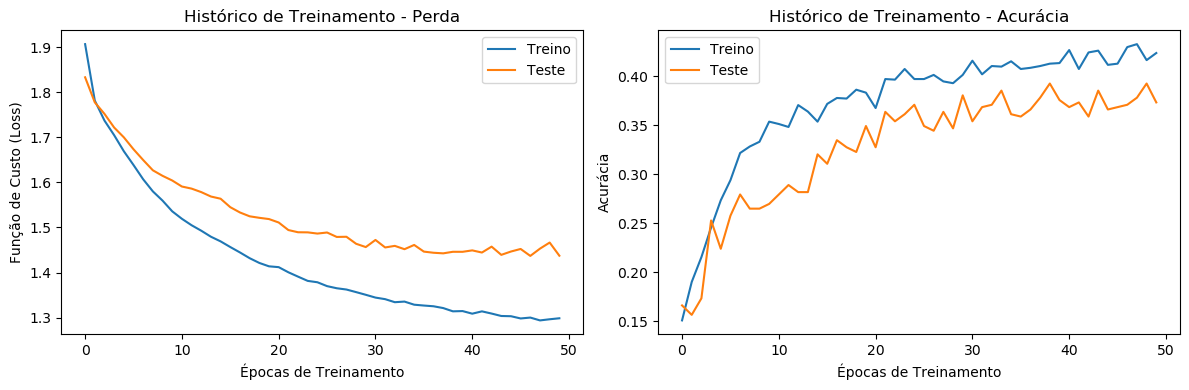

In [36]:
import matplotlib.pyplot as plt
# Plotar gráfico de perda (loss) e acurácia
plt.figure(figsize=(12, 4))

# Gráfico de perda
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Treino')
plt.plot(history.history['val_loss'], label='Teste')
plt.title('Histórico de Treinamento - Perda')
plt.ylabel('Função de Custo (Loss)')
plt.xlabel('Épocas de Treinamento')
plt.legend()

# Gráfico de acurácia
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Treino')
plt.plot(history.history['val_accuracy'], label='Teste')
plt.title('Histórico de Treinamento - Acurácia')
plt.ylabel('Acurácia')
plt.xlabel('Épocas de Treinamento')
plt.legend()

plt.tight_layout()
plt.show()

In [37]:
model.save('seu_modelo.h5')

/home/isabelleserique/.local/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
